# "Final Project: Comparing Artists Across Countries"
> "Comparing Artists Across Countries"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Spurthi Rallapalli, Cindy Zheng, Carol Cheng
- categories: [fastpages, jupyter]

# DH 140 Final Project W22

Spurthi Rallapalli, Cindy Zheng, Carol Cheng
3/11/22

# Comparing Artists Across Countries

Group Member Contribution: 
- Spurthi: Preliminary Data Analysis
- Cindy: Maps + Advanced Data Analysis
- Carol: Lyrical Analysis

## Research Topic Introduction

**Research Question:** Our research question is "How does a song's popularity spread over time depending on the origin country of the artist, and how much of that is attributed to the lyrics / word patterns in that song?"

For this analysis, we specifically picked two artists from the United States and the UK, analyzed the popularity of their songs, and did a lyrical analysis. 

**Why it is important to you, why it matters to others, and what is at stake:** Music is something that everyone connects to, and our group wants to find a way to measure how and why music is spread across the world. It’s a way for musicians to figure out which kind of music allows them to connect with different audiences and cross cultural and linguistic barriers. It’s also a way for us as listeners to help determine what connects us to certain kinds of music, what word frequencies and thematic patterns matter most to us, and what cultural practices and norms cause certain groups to listen (or not to listen) to certain types of music. Essentially, it’s a way to determine what connects us all!

**Description of data sources used:**
The first data source is from Spotify Charts. Spotify Charts is a website from the popular music streaming app, Spotify. Spofity constantly keeps ranking of how often songs are streamed from their uses, and keeps track of which songs are streamed the most. Spotify also separates these streaming counts by country. The top 200 songs of each day or week and their total streams are available to download in csv format from Spotify Charts. The data can be found at https://spotifycharts.com/. 

The second data source will be song lyrics. These can be found on genius.com, and we will be copying and pasting the text lyrics from those websites to perform text analysis. https://genius.com/

## Methods

Below is the code that we used to import the data into our Jupyter Notebook. We went to Spotify Charts to look at Top 200 Hits Data for every week in 2021 in the United States and the UK:   

In [158]:
import pandas as pd
import os
import glob
import datetime
import numpy
from matplotlib import pyplot as plt
#import cloudscraper

def readData(country):
    path = os.getcwd()
    path = os.path.join(path, "Data", country, "*.csv")
    csv_files = glob.glob(path)
    # loop over the list of csv files
    weekly_charts = pd.DataFrame()

    for f in csv_files:

        filename = os.path.basename(f)
        # read the csv file
        df = pd.read_csv(f)

        idx = filename.index('weekly')
        date_time_obj = datetime.datetime.strptime(filename[idx+7:-4], '%Y-%m-%d')

        df["date"] = date_time_obj

        weekly_charts= weekly_charts.append(df)
    return weekly_charts

weekly_us_charts = readData("us")
weekly_gb_charts = readData("gb")
#weekly_global_charts = readData("GlobalData")


In the code above, we created a function readData that allowed us to create 2 different datasets, one for the US and one for the UK. Let's start by doing a preliminary analysis of the data. 

In [159]:
#hide
weekly_us_charts.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,1,12,9688481,2021-10-14
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,2,14,8460919,2021-10-14
2,3,spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,"Drake, 21 Savage, Project Pat",Knife Talk (with 21 Savage ft. Project Pat),OVO,2,3,6,7662116,2021-10-14
3,4,spotify:track:0k1WUmIRnG3xU6fvvDVfRG,"Drake, Future, Young Thug",Way 2 Sexy (with Future & Young Thug),OVO,1,4,6,7071703,2021-10-14
4,5,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,5,5,46,6799327,2021-10-14


In [59]:
#hide
weekly_gb_charts.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,Olivia Rodrigo,drivers license,Olivia Rodrigo PS,1,1,3,5134081,2021-01-28
1,2,spotify:track:27OeeYzk6klgBh83TSvGMA,The Kid LAROI,WITHOUT YOU,Columbia,2,3,12,1777331,2021-01-28
2,3,spotify:track:4I5bvu2KDsrCg0EWHIcvul,"Anne-Marie, KSI, Digital Farm Animals",Don't Play,Asylum Records,2,2,2,1721569,2021-01-28
3,4,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,SZA,Good Days,Top Dawg Entertainment/RCA Records,4,5,5,1484337,2021-01-28
4,5,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,CJ,Whoopty,CJ Music Group/T-Series,3,4,15,1438281,2021-01-28


A quick look into the data shows that there are a couple of fields that our data encompasses that are common among the two datasets: 
- rank
- uri
- arist name(s)
- track name
- source
- peak rank
- previous rank
- weeks on chart
- streams
- date

I also want to get a sense of which dates we are looking at across the two countries, so I'm going to do a quick analysis of the date field to see which dates are included.

In [60]:
#collapse-hide
weekly_us_charts['date'].unique()

array(['2021-10-14T00:00:00.000000000', '2021-08-19T00:00:00.000000000',
       '2021-06-03T00:00:00.000000000', '2021-11-18T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-05-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-06-10T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-07-15T00:00:00.000000000',
       '2021-09-30T00:00:00.000000000', '2021-12-23T00:00:00.000000000',
       '2021-03-18T00:00:00.000000000', '2021-03-25T00:00:00.000000000',
       '2021-09-16T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2021-12-02T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
       '2021-06-17T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-06-24T00:00:00.000000000',
       '2021-05-27T00:00:00.000000000', '2021-05-20T00:00:00.000000000',
       '2021-10-28T00:00:00.000000000', '2021-05-06

In [61]:
#hide
len(weekly_us_charts['date'].unique())

52

In [62]:
#collapse-hide
weekly_gb_charts['date'].unique()

array(['2021-01-28T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2021-12-23T00:00:00.000000000', '2021-06-17T00:00:00.000000000',
       '2021-08-05T00:00:00.000000000', '2021-07-15T00:00:00.000000000',
       '2021-04-22T00:00:00.000000000', '2021-09-30T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-06-03T00:00:00.000000000', '2021-04-15T00:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2021-10-07T00:00:00.000000000',
       '2021-12-02T00:00:00.000000000', '2021-09-16T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-02-25T00:00:00.000000000',
       '2021-05-20T00:00:00.000000000', '2021-09-23T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-05-06T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-11-11

In [63]:
#hide
len(weekly_gb_charts['date'].unique())

52

For this analysis, we want to make sure that the two datasets cover the same dates, so we'll do a check right now to see if the dates are the same. 

In [64]:
for day in weekly_us_charts['date'].unique(): 
    if day not in weekly_gb_charts['date'].unique():
        print(day)

In [65]:
for day in weekly_gb_charts['date'].unique(): 
    if day not in weekly_us_charts['date'].unique():
        print(day)

This means that all the dates are the same in both of the datasets!

The other thing we also noticed is that the dates are not in order, so we will try to reorder them. [This link](https://stackoverflow.com/questions/17141558/how-to-sort-a-dataframe-in-python-pandas-by-two-or-more-columns) helped with that.



In [66]:
weekly_us_charts = weekly_us_charts.sort_values(by=['date','rank'], ascending = [True, True])


In [67]:
weekly_gb_charts = weekly_gb_charts.sort_values(by=['date','rank'], ascending = [True, True])


If we take a look at the first and last few values of each chart, we can see that they have been put in the right order by date and kept the ranking the same. 

In [68]:
#collapse-hide
weekly_us_charts.head(10)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,SZA,Good Days,Top Dawg Entertainment/RCA Records,1,10,2,6323585,2021-01-07
1,2,spotify:track:31qCy5ZaophVA81wtlwLc4,Justin Bieber,Anyone,RBMG/Def Jam,2,-1,1,6149984,2021-01-07
2,3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,Ariana Grande,34+35,Republic Records,2,2,10,5606876,2021-01-07
3,4,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,"24kGoldn, iann dior",Mood (feat. iann dior),Records/Columbia,2,4,22,5583614,2021-01-07
4,5,spotify:track:7hxHWCCAIIxFLCzvDgnQHX,"Internet Money, Gunna, Don Toliver, NAV","Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money Records/ TenThousand Projects,1,5,21,5368252,2021-01-07
5,6,spotify:track:4MzXwWMhyBbmu6hOcLVD49,"Bad Bunny, Jhay Cortez",DÁKITI,Rimas Entertainment LLC,1,6,10,5161927,2021-01-07
6,7,spotify:track:35mvY5S1H3J2QZyna3TFe0,Ariana Grande,positions,Republic Records,1,9,11,5102841,2021-01-07
7,8,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,CJ,Whoopty,CJ Music Group/T-Series,8,13,11,4877062,2021-01-07
8,9,spotify:track:27OeeYzk6klgBh83TSvGMA,The Kid LAROI,WITHOUT YOU,Columbia,9,11,8,4777818,2021-01-07
9,10,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,Republic Records,1,19,58,4440447,2021-01-07


In [69]:
#collapse-hide
weekly_us_charts.tail(10)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
190,191,spotify:track:370oYn3s5EKu7ziUpMQQTr,Amy Grant,White Christmas,Amy Grant Label (AGG),65,127,11,1561617,2021-12-30
191,192,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,EMI / Interscope,4,192,46,1553987,2021-12-30
192,193,spotify:track:2ZXxRC6V6AXzMdbLQZMHSB,Lil Tecca,LOT OF ME,Galactic / Republic Records,65,-1,13,1553543,2021-12-30
193,194,spotify:track:30QR0ndUdiiMQMA9g1PGCm,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",G59 Records,37,-1,39,1551895,2021-12-30
194,195,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,Shawn Mendes,It'll Be Okay,Shawn Mendes LP4-5 PS/ Island,100,-1,2,1551299,2021-12-30
195,196,spotify:track:4jPy3l0RUwlUI9T5XHBW2m,"24kGoldn, iann dior",Mood (feat. iann dior),Records/Columbia,2,-1,72,1544286,2021-12-30
196,197,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,The Weeknd,Die For You,Universal Republic Records,74,-1,42,1536551,2021-12-30
197,198,spotify:track:7kDUspsoYfLkWnZR7qwHZl,"Machine Gun Kelly, blackbear",my ex's best friend (with blackbear),Bad Boy/Interscope Records,11,195,73,1528614,2021-12-30
198,199,spotify:track:3J8EOeKLTLXORtWPpOU5bE,"Lil Tjay, 6LACK",Calling My Phone,Columbia,1,-1,41,1521613,2021-12-30
199,200,spotify:track:0uRrG2jRR5tuifsYIJHEao,Morgan Wallen,Sand In My Boots,Big Loud / Republic,13,-1,27,1518916,2021-12-30


I also wanted to do some summary statistics for each day.

In [70]:
days = weekly_us_charts['date'].unique()

In [71]:
#collapse-hide
for i in days:
    avg_week_on_charts = 0
    max_week_on_charts = 0
    subset = weekly_us_charts.loc[weekly_us_charts['date'] == i]
    avg_week_on_charts = subset['weeks_on_chart'].mean()
    max_week_on_charts = subset['weeks_on_chart'].max()
    avg_streams = subset['streams'].mean()
    peak_ranking = subset['peak_rank'].mode()
    ts = pd.to_datetime(str(i)) 
    d = ts.strftime('%Y-%m-%d')
    print("Country: United States")
    print("Date: ", d)
    print("Average number of weeks this week’s top 200 have been on the chart: ", avg_week_on_charts)
    print("Maximum number of weeks this week’s top 200 have been on the chart: ", max_week_on_charts)
    print("Average number of steams of weeks this week’s top 200: ", avg_streams)
    print("Most common peak ranking of weeks this week’s top 200: ", peak_ranking[0])
    print("")

Country: United States
Date:  2021-01-07
Average number of weeks this week’s top 200 have been on the chart:  38.125
Maximum number of weeks this week’s top 200 have been on the chart:  210
Average number of steams of weeks this week’s top 200:  2209871.275
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-14
Average number of weeks this week’s top 200 have been on the chart:  32.755
Maximum number of weeks this week’s top 200 have been on the chart:  211
Average number of steams of weeks this week’s top 200:  2657771.18
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-21
Average number of weeks this week’s top 200 have been on the chart:  33.89
Maximum number of weeks this week’s top 200 have been on the chart:  212
Average number of steams of weeks this week’s top 200:  2521075.2
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-28
Average numb

For the data above, I used [this link](https://stackoverflow.com/questions/19502506/convert-numpy-datetime64-to-string-object-in-python) to make the date more readable.

Now, we did the same for the United Kingdom data.

In [72]:
#collapse-hide
# the days are the same so I won't redeclare them

for i in days:
    avg_week_on_charts = 0
    max_week_on_charts = 0
    subset = weekly_gb_charts.loc[weekly_gb_charts['date'] == i]
    avg_week_on_charts = subset['weeks_on_chart'].mean()
    max_week_on_charts = subset['weeks_on_chart'].max()
    avg_streams = subset['streams'].mean()
    peak_ranking = subset['peak_rank'].mode()
    ts = pd.to_datetime(str(i)) 
    d = ts.strftime('%Y-%m-%d')
    print("Country: United Kingdom")
    print("Date: ", d)
    print("Average number of weeks this week’s top 200 have been on the chart: ", avg_week_on_charts)
    print("Maximum number of weeks this week’s top 200 have been on the chart: ", max_week_on_charts)
    print("Average number of steams of weeks this week’s top 200: ", avg_streams)
    print("Most common peak ranking of weeks this week’s top 200: ", peak_ranking[0])
    print("")

Country: United Kingdom
Date:  2021-01-07
Average number of weeks this week’s top 200 have been on the chart:  43.0
Maximum number of weeks this week’s top 200 have been on the chart:  211
Average number of steams of weeks this week’s top 200:  520903.335
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-14
Average number of weeks this week’s top 200 have been on the chart:  39.57
Maximum number of weeks this week’s top 200 have been on the chart:  212
Average number of steams of weeks this week’s top 200:  584180.265
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-21
Average number of weeks this week’s top 200 have been on the chart:  40.41
Maximum number of weeks this week’s top 200 have been on the chart:  213
Average number of steams of weeks this week’s top 200:  604862.895
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-28
Average num

Then we looked at the streams for the number 1 song each week and plotted it for both the US and the UK, just to see what the trends looked like. 

In [73]:
number1us = weekly_us_charts.loc[weekly_us_charts['rank'] == 1]

In [74]:
number1uk = weekly_gb_charts.loc[weekly_gb_charts['rank'] == 1]

<AxesSubplot:xlabel='date'>

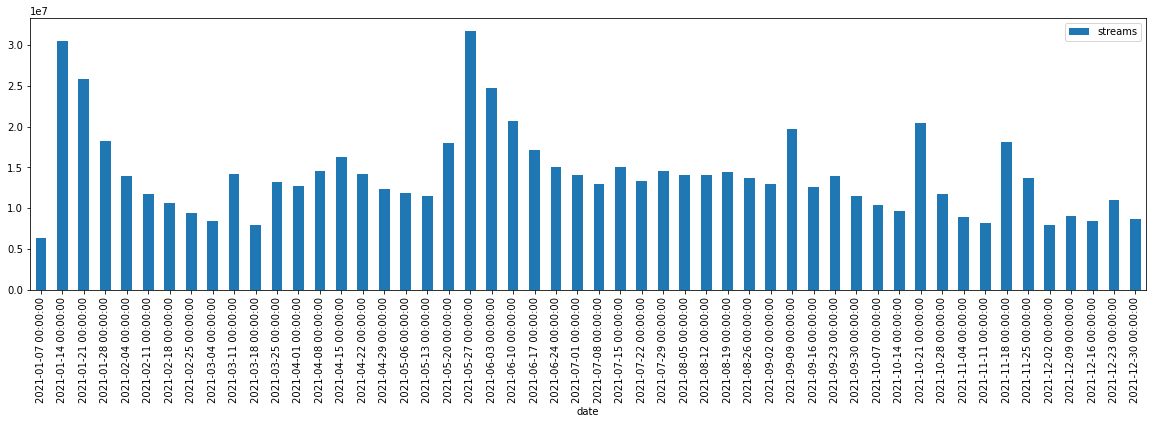

In [75]:
number1us.plot(kind='bar', x='date', y='streams', figsize=(20,5))

<AxesSubplot:xlabel='date'>

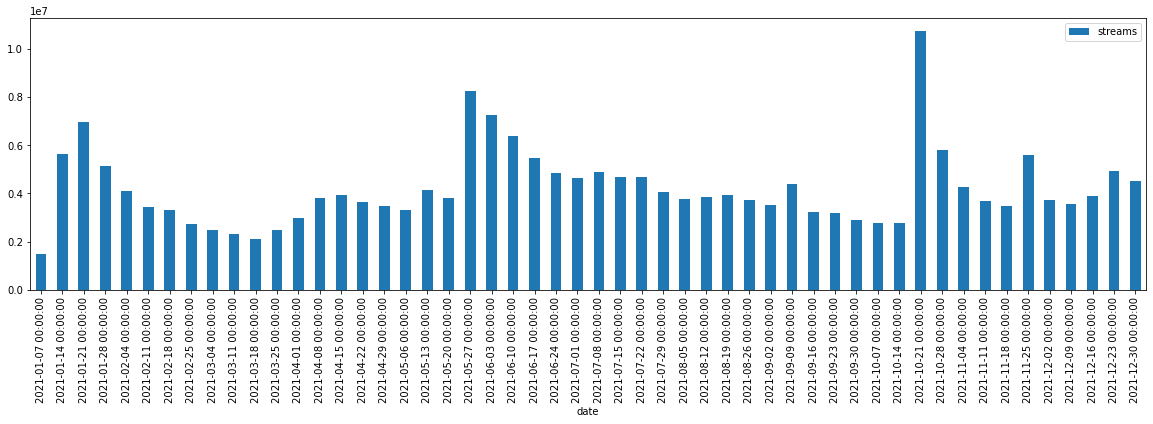

In [76]:
number1uk.plot(kind='bar', x='date', y='streams', figsize=(20,5))

We also wanted to plot the current rank compared with the previous rank for one week. We picked the day at random (2021-11-18) and plotted it for both the US and UK.

In [77]:
#collapse-hide
peakprevUS = weekly_us_charts.loc[weekly_us_charts['date'] == "2021-11-18T00:00:00.000000000"]
peakprevUS.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5enxwA8aAbwZbf5qCHORXi,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,1,-1,1,18105602,2021-11-18
1,2,spotify:track:7sMBvZCSUl99bJLXZaLa0b,"Bruno Mars, Anderson .Paak, Silk Sonic",Smokin Out The Window,Aftermath Entertainment/Atlantic,2,5,2,10067882,2021-11-18
2,3,spotify:track:4OAuvHryIVv4kMDNSLuPt6,Taylor Swift,Red (Taylor's Version),Taylor Swift,3,-1,1,8676447,2021-11-18
3,4,spotify:track:3nsfB1vus2qaloUdcBZvDu,Taylor Swift,All Too Well (Taylor's Version),Taylor Swift,4,-1,1,8403008,2021-11-18
4,5,spotify:track:01K4zKU104LyJ8gMb7227B,"Taylor Swift, Phoebe Bridgers",Nothing New (feat. Phoebe Bridgers) (Taylor’s ...,Taylor Swift,5,-1,1,7818397,2021-11-18


We want to filter out the ones that have -1 as a ranking, which means they probably weren't on the ranking before, and then plot it.

<AxesSubplot:xlabel='rank', ylabel='previous_rank'>

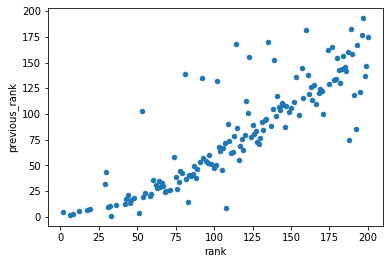

In [78]:
#hide
peakprevfiltUS = peakprevUS.loc[peakprevUS['previous_rank'] != -1]
peakprevfiltUS.plot(kind='scatter', x='rank', y='previous_rank')

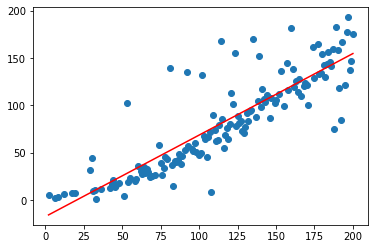

In [79]:
#collapse-hide
X = peakprevfiltUS["rank"]
y = peakprevfiltUS["previous_rank"]
theta = numpy.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.show()

In [80]:
peakprevUK = weekly_gb_charts.loc[weekly_gb_charts['date'] == "2021-11-18T00:00:00.000000000"]
peakprevUK.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,1,5,3458623,2021-11-18
1,2,spotify:track:5enxwA8aAbwZbf5qCHORXi,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,2,-1,1,2787198,2021-11-18
2,3,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,1,2,10,2616693,2021-11-18
3,4,spotify:track:7rglLriMNBPAyuJOMGwi39,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,EMI,2,4,14,2237196,2021-11-18
4,5,spotify:track:2BzAGK3lEZAQz5cU0Ae1wd,ArrDee,Flowers (Say My Name),Universal-Island Records Ltd.,5,5,2,2139786,2021-11-18


<AxesSubplot:xlabel='rank', ylabel='previous_rank'>

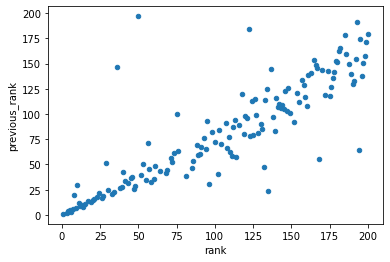

In [81]:
#hide
peakprevfiltUK = peakprevUK.loc[peakprevUK['previous_rank'] != -1]
peakprevfiltUK.plot(kind='scatter', x='rank', y='previous_rank')

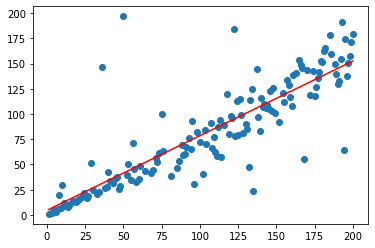

In [82]:
#collapse-hide
X = peakprevfiltUK["rank"]
y = peakprevfiltUK["previous_rank"]
theta = numpy.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.show()

After this preliminary research, we determined that we wanted to look at 2 artists for our research question: Adele, who is from the UK, and Lil Nas X, who is from the US. So we did a little bit more exploratory analysis into these two artists. 

In [83]:
#hide
# Go through US charts and find all the rows with Lil Nas X
lilnasxUS = weekly_us_charts.loc[weekly_us_charts['artist_names'].str.contains("Lil Nas X")]
print(len(lilnasxUS))
lilnasxUS.head()

121


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
18,19,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,16,8,3804112,2021-01-07
32,33,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,19,9,3590559,2021-01-14
31,32,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,33,10,3304136,2021-01-21
41,42,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,32,11,2890140,2021-01-28
47,48,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,42,12,2670692,2021-02-04


In [84]:
#hide
# Go through UK charts and find all the rows with Lil Nas X
lilnasxUK = weekly_gb_charts.loc[weekly_gb_charts['artist_names'].str.contains("Lil Nas X")]
print(len(lilnasxUK))
lilnasxUK.head()

106


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
18,19,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,47,8,870167,2021-01-07
23,24,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,19,9,853586,2021-01-14
33,34,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,24,10,775141,2021-01-21
47,48,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,34,11,691652,2021-01-28
58,59,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,48,12,602965,2021-02-04


In [85]:
#hide
# Go through US charts and find all the rows with Adele
adeleUS = weekly_us_charts.loc[weekly_us_charts['artist_names'].str.contains("Adele")]
print(len(adeleUS))
adeleUS.head()

73


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
167,168,spotify:track:6O5TrlFWTYvznd9fMC0VvU,Adele,When We Were Young,XL Recordings,168,-1,1,1500336,2021-10-14
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,-1,1,20462767,2021-10-21
34,35,spotify:track:6O5TrlFWTYvznd9fMC0VvU,Adele,When We Were Young,XL Recordings,35,168,2,3150036,2021-10-21
44,45,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,45,-1,1,2769224,2021-10-21
53,54,spotify:track:6IAZHEBUIGJ6NJKxxOBIEr,Adele,Rolling in the Deep,XL Recordings,54,-1,1,2506748,2021-10-21


In [86]:
#hide
# Go through UK charts and find all the rows with Adele
adeleUK = weekly_gb_charts.loc[weekly_gb_charts['artist_names'].str.contains("Adele")]
print(len(adeleUK))
adeleUK.head()

168


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
173,174,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,-1,9,338653,2021-01-14
186,187,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,174,10,333786,2021-01-21
176,177,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,187,11,341364,2021-01-28
185,186,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,177,12,342555,2021-02-04
177,178,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,186,13,340240,2021-02-11


Interestingly already, we see a bit of a difference! In the year 2021, Lil Nas X (US) was on the weekly Top 200 charts in the US 88 times, while he was on the weekly Top 200 charts in UK for a fewer number of times 78. For Adele, she was on the US charts 73 times but on the UK ones 168 times. 

For both of these artists, we also wanted to look at the songs that appeared on the charts.

In [87]:
#hide_input
lilnasxUS['track_name'].unique()

array(['HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN',
       'INDUSTRY BABY (feat. Jack Harlow)', 'THATS WHAT I WANT',
       'SCOOP (feat. Doja Cat)',
       'DOLLA SIGN SLIME (feat. Megan Thee Stallion)', 'DEAD RIGHT NOW',
       'TALES OF DOMINICA', 'LOST IN THE CITADEL',
       'ONE OF ME (feat. Elton John)',
       'AM I DREAMING (feat. Miley Cyrus)', 'DONT WANT IT', 'VOID',
       'LIFE AFTER SALEM'], dtype=object)

In [88]:
#hide_input
lilnasxUK['track_name'].unique()

array(['HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN',
       'INDUSTRY BABY (feat. Jack Harlow)', 'THATS WHAT I WANT',
       'SCOOP (feat. Doja Cat)', 'DEAD RIGHT NOW',
       'DOLLA SIGN SLIME (feat. Megan Thee Stallion)',
       'TALES OF DOMINICA', 'LOST IN THE CITADEL',
       'ONE OF ME (feat. Elton John)', 'DONT WANT IT',
       'AM I DREAMING (feat. Miley Cyrus)', 'VOID'], dtype=object)

In [89]:
#hide_input
adeleUS['track_name'].unique()

array(['When We Were Young', 'Easy On Me', 'Someone Like You',
       'Rolling in the Deep', 'Love In The Dark', 'Set Fire to the Rain',
       'All I Ask', 'Chasing Pavements',
       'Send My Love (To Your New Lover)', 'Make You Feel My Love',
       'Hello', 'Oh My God', 'Can I Get It', 'My Little Love',
       'I Drink Wine', 'Strangers By Nature', 'Cry Your Heart Out',
       'To Be Loved', 'All Night Parking (with Erroll Garner) Interlude',
       'Woman Like Me', 'Hold On', 'Love Is A Game'], dtype=object)

In [90]:
#hide_input
adeleUK['track_name'].unique()

array(['Someone Like You', 'Make You Feel My Love', 'Rolling in the Deep',
       'When We Were Young', 'Love In The Dark', 'Chasing Pavements',
       'Set Fire to the Rain', 'Send My Love (To Your New Lover)',
       'Rumour Has It', 'All I Ask', 'Skyfall', 'Hello', 'Easy On Me',
       'Turning Tables', 'Water Under the Bridge', 'Hometown Glory',
       'Remedy', 'Oh My God', 'I Drink Wine', 'My Little Love',
       'Can I Get It', 'Strangers By Nature', 'Cry Your Heart Out',
       'To Be Loved', 'Hold On',
       'All Night Parking (with Erroll Garner) Interlude',
       'Woman Like Me', 'Love Is A Game'], dtype=object)

In [91]:
#collapse-hide
# Find songs in one list that aren't on the other
lilnasxUKsongs = lilnasxUK['track_name'].unique()
lilnasxUSsongs = lilnasxUS['track_name'].unique()

for song in lilnasxUSsongs:
    if song not in lilnasxUKsongs:
        print("The song " + song + " is in the US charts but not the UK charts")
        
for songs in lilnasxUKsongs:
    if songs not in lilnasxUSsongs:
        print("The song " + songs + " is in the UK charts but not the US charts")

The song LIFE AFTER SALEM is in the US charts but not the UK charts


In [92]:
#collapse-hide
# Find songs in one list that aren't on the other
adeleUKsongs = adeleUK['track_name'].unique()
adeleUSsongs = adeleUS['track_name'].unique()

for song in adeleUSsongs:
    if song not in adeleUKsongs:
        print("The song " + song + " is in the US charts but not the UK charts")
        
for songs in adeleUKsongs:
    if songs not in adeleUSsongs:
        print("The song " + songs + " is in the UK charts but not the US charts")

The song Rumour Has It is in the UK charts but not the US charts
The song Skyfall is in the UK charts but not the US charts
The song Turning Tables is in the UK charts but not the US charts
The song Water Under the Bridge is in the UK charts but not the US charts
The song Hometown Glory is in the UK charts but not the US charts
The song Remedy is in the UK charts but not the US charts


We then wanted to see the rankings of each of the songs for each of the artists in plot form


## Rankings for Lil Nas X songs in US

<AxesSubplot:xlabel='track_name'>

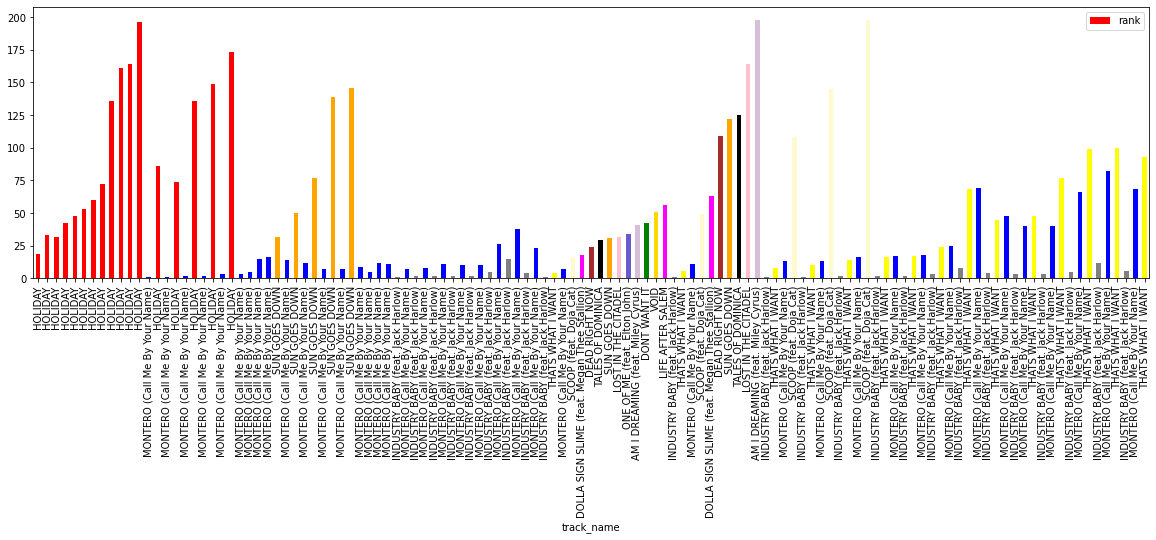

In [94]:
#hide_input
#HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN', 'THATS WHAT I WANT', 'DEAD RIGHT NOW', 'TALES OF DOMINICA', 'LOST IN THE CITADEL', 'DONT WANT IT', 'VOID

songs = lilnasxUS['track_name'].values

barcolors = []
for song in songs:
    #print(song[0] == "HOLIDAY")
    #song = y.astype("string")
    if song == "HOLIDAY":
        barcolors.append('red')
    elif song == "MONTERO (Call Me By Your Name)":
        barcolors.append('blue')
    elif song == "SUN GOES DOWN":
        barcolors.append('orange')
    elif song == "THATS WHAT I WANT":
        barcolors.append('yellow')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('brown')
    elif song == "TALES OF DOMINICA":
        barcolors.append('black')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('purple')
    elif song == "LOST IN THE CITADEL":
        barcolors.append('pink')
    elif song == "DONT WANT IT":
        barcolors.append('green')
    elif song == "VOID":
        barcolors.append('gold')
    elif song == "LIFE AFTER SALEM":
        barcolors.append('magenta')
    elif song == "INDUSTRY BABY (feat. Jack Harlow)":
        barcolors.append('grey')
    elif song == "SCOOP (feat. Doja Cat)":
        barcolors.append('lemonchiffon')
    elif song == "DOLLA SIGN SLIME (feat. Megan Thee Stallion)":
        barcolors.append('magenta')
    elif song == "ONE OF ME (feat. Elton John)":
        barcolors.append('slateblue')
    elif song == "AM I DREAMING (feat. Miley Cyrus)":
        barcolors.append('thistle')
    
lilnasxUS.plot(kind='bar', x='track_name', y='rank', figsize=(20,5), color=barcolors)

In [95]:
## Rankings for Lil Nas X songs in UK

<AxesSubplot:xlabel='track_name'>

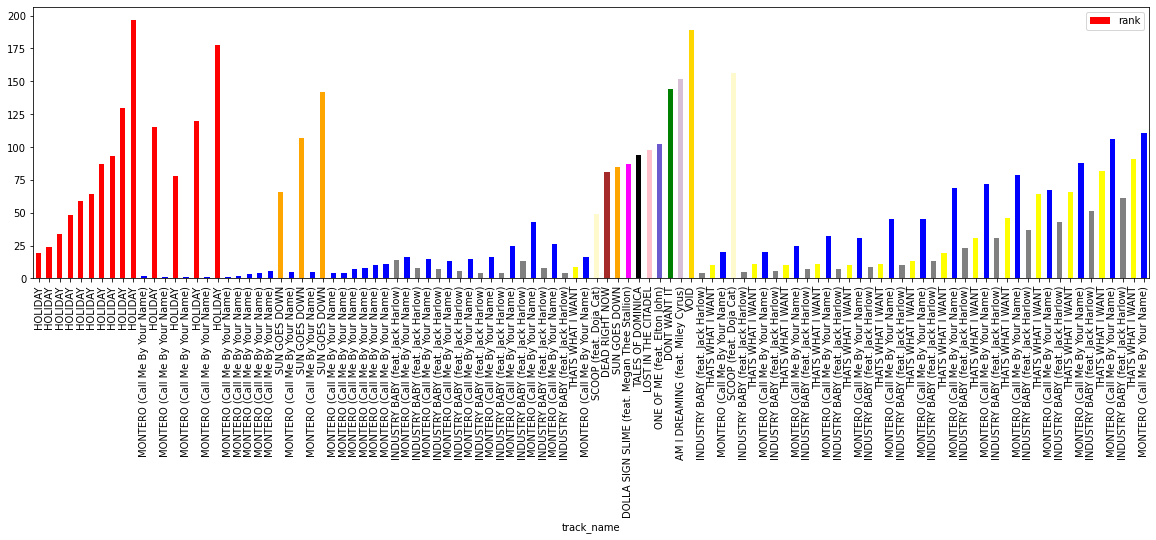

In [96]:
#hide_input
songs = lilnasxUK['track_name'].values

barcolors = []
for song in songs:
    #print(song[0] == "HOLIDAY")
    #song = y.astype("string")
    if song == "HOLIDAY":
        barcolors.append('red')
    elif song == "MONTERO (Call Me By Your Name)":
        barcolors.append('blue')
    elif song == "SUN GOES DOWN":
        barcolors.append('orange')
    elif song == "THATS WHAT I WANT":
        barcolors.append('yellow')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('brown')
    elif song == "TALES OF DOMINICA":
        barcolors.append('black')
    elif song == "DEAD RIGHT NOW":
        barcolors.append('purple')
    elif song == "LOST IN THE CITADEL":
        barcolors.append('pink')
    elif song == "DONT WANT IT":
        barcolors.append('green')
    elif song == "VOID":
        barcolors.append('gold')
    elif song == "INDUSTRY BABY (feat. Jack Harlow)":
        barcolors.append('grey')
    elif song == "SCOOP (feat. Doja Cat)":
        barcolors.append('lemonchiffon')
    elif song == "DOLLA SIGN SLIME (feat. Megan Thee Stallion)":
        barcolors.append('magenta')
    elif song == "ONE OF ME (feat. Elton John)":
        barcolors.append('slateblue')
    elif song == "AM I DREAMING (feat. Miley Cyrus)":
        barcolors.append('thistle')
    
lilnasxUK.plot(kind='bar', x='track_name', y='rank', figsize=(20,5), color=barcolors)

We want to plot the ranks of the songs in each country for both Lil Nas X and Adele. 

## Rankings for Lil Nas X songs in US (scatterplot and by date)

<AxesSubplot:xlabel='date', ylabel='rank'>

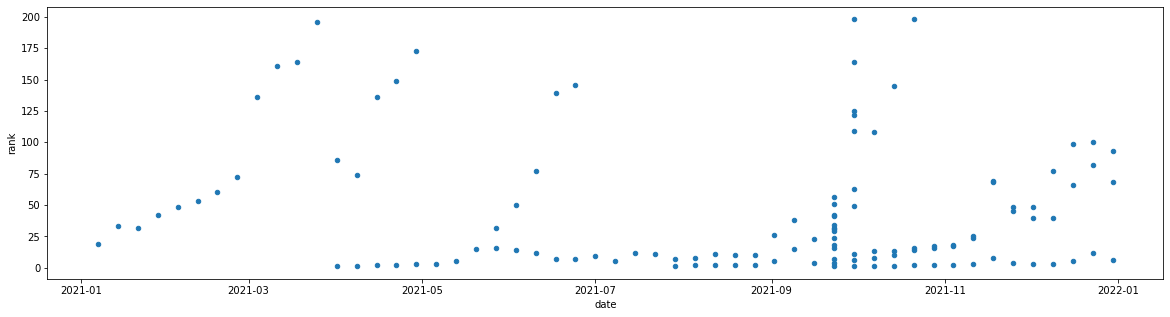

In [97]:
lilnasxUS.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

## Rankings for Lil Nas X songs in UK (scatterplot and by date)

<AxesSubplot:xlabel='date', ylabel='rank'>

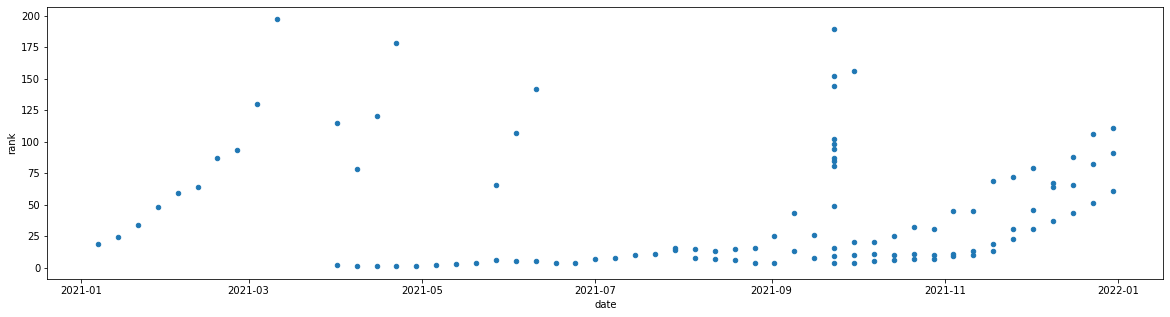

In [98]:
lilnasxUK.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

## Rankings for Adele songs in US (scatterplot and by date)

<AxesSubplot:xlabel='date', ylabel='rank'>

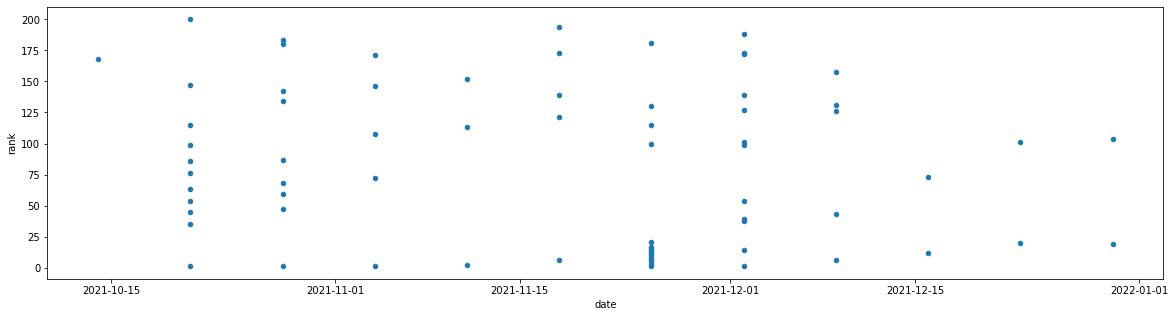

In [99]:
adeleUS.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

## Rankings for Adele songs in UK (scatterplot and by date)

<AxesSubplot:xlabel='date', ylabel='rank'>

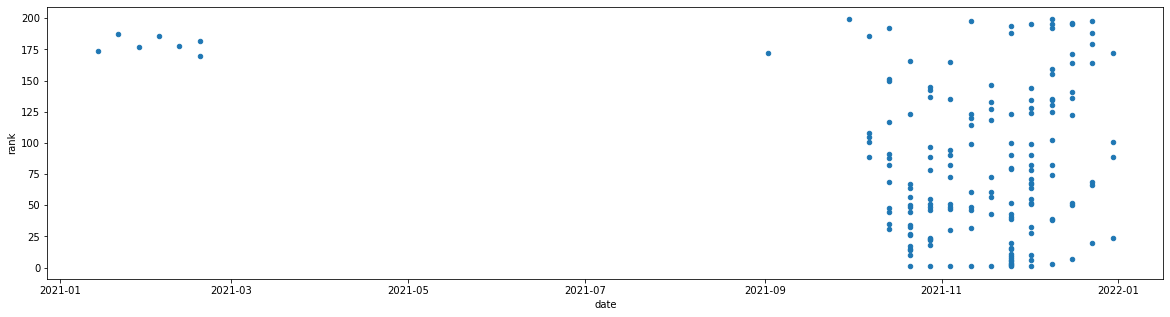

In [100]:
adeleUK.plot(kind='scatter', x='date', y='rank', figsize=(20,5))

## Results

As we can see from above, a preliminary analysis of the data showed some interesting trends. 

First, doing a preliminary analysis of the data by looking at **streams of the Top 200 Hits for each week for eacch country in the year 2021** showed that people in the US streamed quite a bit more than people in the UK. While the maximum number of streams we say in the US was 3*10^7, the maximum that we saw in the UK was 10^7. 

We also did a short analysis on the ranking of the **ranks for a certain day versus the previous rank that it held**. While we found that most of them held the same ranking as the week before (ie, lots of points fell along the x=y line), there were visually apparent differences between the US and UK graphs. *For the US scatter plot, a lot of the points that didn't fall near the x=y line were towards the songs with the most ranking, while in the UK it seemed like there were points along the smaller rankings as well that didn't fall close to that line.* We thought that was interesting, since the songs with the lowest rankings are ones that are the most frequently listened to/usually stayed ranked higher. 

In order to answer our research question, we examined the ranks of two artists: **Lil Nas X, who is from the US**, and **Adele, who is from the UK**. The first goal of our data exploration was to see if the origin country of an artist affects their presence on the weekly Top 200 Hits list. 

The first analysis we did was a simple one -- **checking to see how many times each artists's songs showed up in the weekly charts for each country** (note: we also counted if a song showed up on the charts multiple times in the same day). We immediately saw that in the year 2021, Lil Nas X (US) was on the weekly Top 200 charts in the US 88 times, while he was on the weekly Top 200 charts in UK for a fewer number of times 78. For Adele, she was on the US charts 73 times but on the UK ones 168 times, which is considerably more. *So it seems that the country that an artist is from is slightly correlated with their frequency on the charts.*

Next, we wanted to see **if more songs were listened to by Spotify users of the same country as the artist**. So we went through to see which Lil Nas X songs were listened to by US listeners but not UK listeners, and which Adele songs were listened to by UK listeners but not US listeners. We found that:

For Lil Nas X:
- The song LIFE AFTER SALEM is in the US charts but not the UK charts

For Adele: 
- The song Rumour Has It is in the UK charts but not the US charts
- The song Skyfall is in the UK charts but not the US charts
- The song Turning Tables is in the UK charts but not the US charts
- The song Water Under the Bridge is in the UK charts but not the US charts
- The song Hometown Glory is in the UK charts but not the US charts
- The song Remedy is in the UK charts but not the US charts

*In this way, we found that the listeners might listen to more songs from an album (therefore giving the songs a higher ranking) if the artist they are listening to is from their country.*

Then, we wanted to see the **rankings of each of the songs for Lil Nas X in plot form**. We didn't see many surprising results here, as we saw drop off of rankings of songs similarly for Lil Nas X in the US and the UK. (The bar chart looks very similar). 

Afterward, we wanted to **compare the ranks of the songs in each country for each of the artists as compared to the days that they were on the Top 200 Chart**. This analysis also produced interesting results, as we found similar rankings of Lil Nas X's songs in both the US and UK (visually, it seems that Lil Nas X's rankings were slightly lower in the US during that time, but it's a fairly small difference that we didn't feel like we could make a strong conclusion about it), but Adele had songs that were popular in the UK earlier on during the year that weren't on the charts in the US (during Jan 2021 - October 2021) (examining the Y scales of both the scatterplots for Adele). This analysis of ranking as compared to the dates showed us that *the country that an artist is from is slightly correlated with their ranking and frequency on the charts*. 

# Map Analysis 

In [101]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [102]:
#hide
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [103]:
#hide
adeleUSRankToDate = adeleUS[["rank", "date"]]
adeleUSMonthlyRank = adeleUSRankToDate.groupby([adeleUSRankToDate['date'].dt.to_period('M')], as_index='false').mean()
adeleUSMonthlyRank["iso_a3"] = "USA"
print(len(adeleUSMonthlyRank))
adeleUKRankToDate = adeleUK[["rank", "date"]]
adeleUKMonthlyRank = adeleUKRankToDate.groupby([adeleUKRankToDate['date'].dt.to_period('M')], as_index='false').mean()
len(adeleUKMonthlyRank)
adeleUKMonthlyRank["iso_a3"] = "GBR"

3


In [104]:
#hide
lilnasxUSRankToDate = lilnasxUS[["rank", "date"]]
lilnasxUSMonthlyRank = lilnasxUSRankToDate.groupby([lilnasxUSRankToDate['date'].dt.to_period('M')], as_index='false').mean()
print(len(lilnasxUSMonthlyRank))
lilnasxUSMonthlyRank["iso_a3"] = "USA"
lilnasxUKRankToDate = lilnasxUK[["rank", "date"]]
lilnasxUKMonthlyRank = lilnasxUKRankToDate.groupby([lilnasxUKRankToDate['date'].dt.to_period('M')], as_index='false').mean()
len(lilnasxUKMonthlyRank)
lilnasxUKMonthlyRank["iso_a3"] = "GBR"
#print(lilnasxUKMonthlyRank)

12


In [106]:
def plotmaps(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index:
            d = {'rank': [df1.loc[date]["rank"], df2.loc[date]["rank"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
#             plt.subplot(1, 2, 1)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="rank", cmap="viridis",legend=True)
            plt.title(date.strftime('%b-%Y') + " " + artist + " Mean Rank (relative)")


## Lil Nas X Map Plots of Average Ranking 

Color Map plots of US and UK's average ranking for all Lil Nas X songs. 

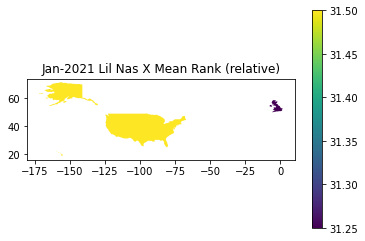

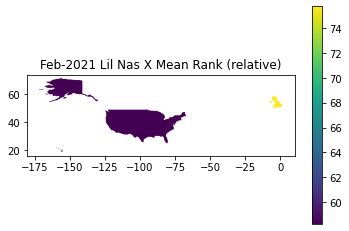

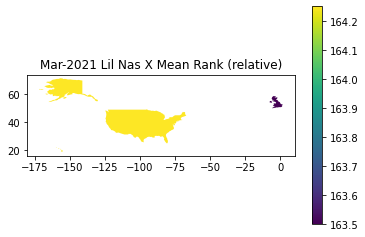

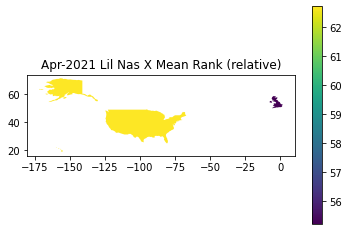

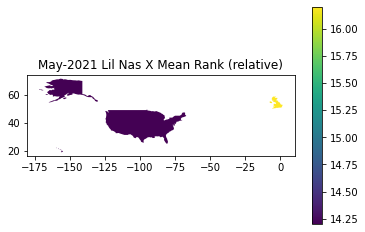

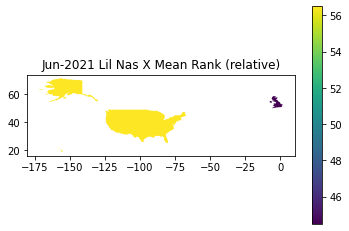

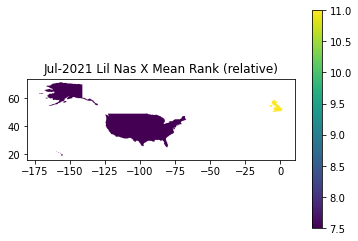

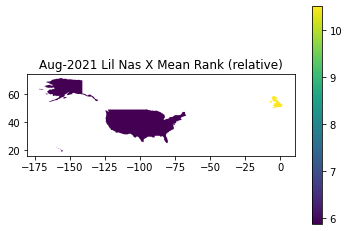

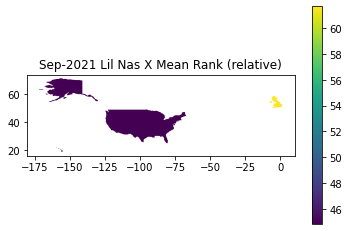

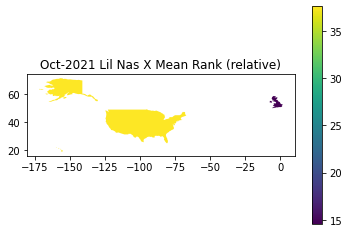

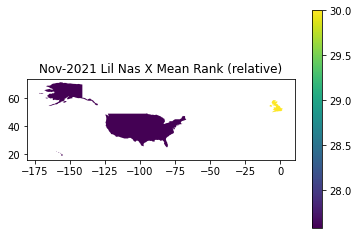

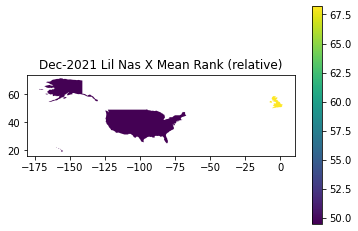

In [107]:
#hide_input
plotmaps(lilnasxUSMonthlyRank, lilnasxUKMonthlyRank, "Lil Nas X")

## Initial Map analysis 

Above are monthly graphs of the rankings of the songs for both US and UK. You can see that the regions are colored by the average ranking of the artist Lil Nas X. The darker purple is indicative of a smaller rank number, which means that the song is charting better. 

These are the relative rankings of Lil Nas X. Relative rankings mean that the legend is bounded by both the country's min and max ranking, and each map is only loosely related. These maps are best for examining the change between the US and UK ranking in respect to each other. 

As you can see, in the beginning of the year, the UK is actually ranking Lil Nas X songs higher. But also looking at the ranges, the ranges are quite small- less than 10 ranks apart. 

## Some issues

There is some concern that since I am averaging ranks, if Lil Nas X has multiple charting songs, some lower charting songs can drag down the average rank of his songs- so he may be doing pretty well but we don't see it reflected. 

We can rectify this in 2 ways- 
1. We can look at the average rank of just one song
2. We can look at the stream ratio of his songs (overall Lil Nas X streams vs all streams on the top 200). 

Let's start with the first solution. His hit song "Industry Baby" came out in July, and we will do lyrical analysis of this song, so what if we looked at only those times and the rank of that song? 



## Lil Nas X's Industry Baby Average Ranking Map plots- July/August only 
Industry Baby was released July 23rd, 2021!  

In [108]:
#hide
lilnasxUSMontero = lilnasxUS.loc[lilnasxUS['track_name'] == "INDUSTRY BABY (feat. Jack Harlow)"]
lilnasxUSMontero.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:27NovPIUIRrOZoCHxABJwK,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,-1,1,14513619,2021-07-29
1,2,spotify:track:27NovPIUIRrOZoCHxABJwK,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,1,2,13036840,2021-08-05
1,2,spotify:track:27NovPIUIRrOZoCHxABJwK,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,2,3,11851792,2021-08-12
1,2,spotify:track:27NovPIUIRrOZoCHxABJwK,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,2,4,11672268,2021-08-19
1,2,spotify:track:27NovPIUIRrOZoCHxABJwK,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,2,5,11031868,2021-08-26


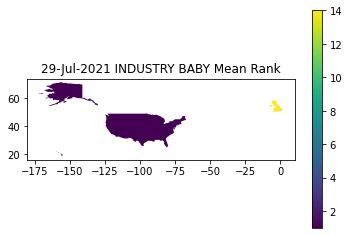

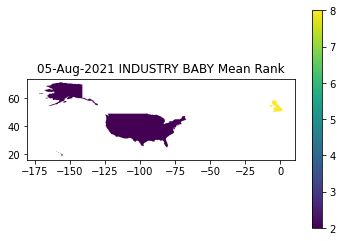

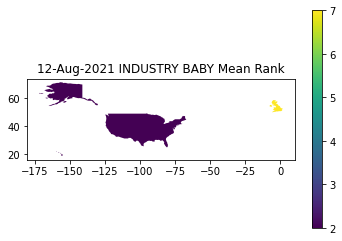

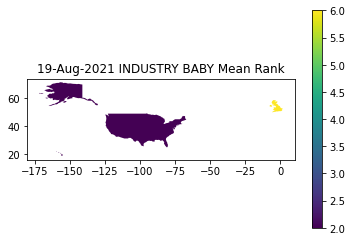

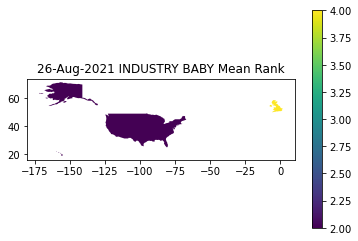

In [109]:
#hide_input
def plotmapForIndustryBaby(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index and date.month == 7 or date.month == 8:
            d = {'rank': [df1.loc[date]["rank"], df2.loc[date]["rank"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="rank", cmap="viridis",legend=True)
            plt.title(date.strftime('%d-%b-%Y') + " " + artist + " Mean Rank")
lilnasxUSMontero = lilnasxUS.loc[lilnasxUS['track_name'] == "INDUSTRY BABY (feat. Jack Harlow)"]
lilnasxUSRankToDate = lilnasxUSMontero[["rank", "date"]]

lilnasxUKMontero = lilnasxUK.loc[lilnasxUK['track_name'] == "INDUSTRY BABY (feat. Jack Harlow)"]
lilnasxUKRankToDate = lilnasxUKMontero[["rank", "date"]]

lilnasxUSWeeklyRank = lilnasxUSRankToDate.groupby([lilnasxUSRankToDate['date'].dt.date], as_index='false').mean()
lilnasxUSWeeklyRank["iso_a3"] = "USA"

lilnasxUKWeeklyRank = lilnasxUKRankToDate.groupby([lilnasxUKRankToDate['date'].dt.date], as_index='false').mean()
lilnasxUKWeeklyRank["iso_a3"] = "GBR"

plotmapForIndustryBaby(lilnasxUSWeeklyRank, lilnasxUKWeeklyRank, "INDUSTRY BABY")

## Map Analysis of Mean Ranking for INDUSTRY BABY 
Looking at the just July and August maps, we can see that Lil Nas X's new song was doing the best in the US. We can see that it debuted to a high peak in the US, and stayed that high throughout the month after it was released. The UK was slower to catch up, as the UK's ranking of INDUSTRY BABY started lower at 14 and lowly climbed up to around 4. 

This is a little different than the aggregate mean rankings from the first map graphs told us, suggesting that the mean rankings of multiple songs is misleading, as our analysis of just the mean rank of INDUSTRY BABY clearly shows that US is faster to highly rank Lil Nas X's songs, and also that the US keeps the rank higher for longer than the UK. 

Now knowing that our initial way of analyzing mean rankings was incorrect, let's instead use the stream ratio (# of Lil Nas X streams/ total streams) to graph. 

## Map Analysis of Monthly Stream Ratio for Lil Nas X

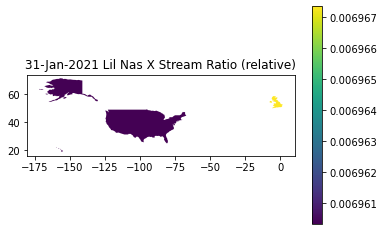

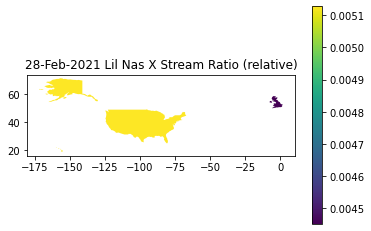

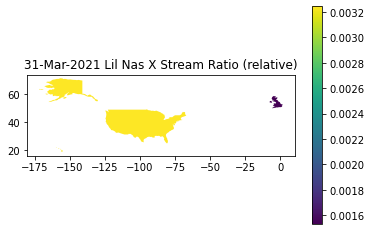

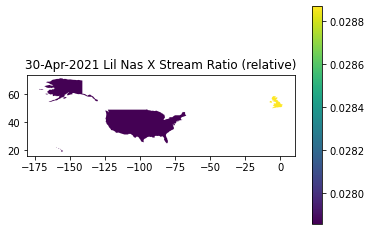

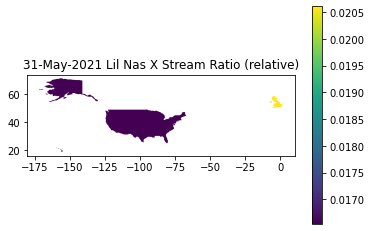

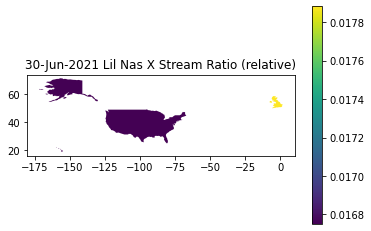

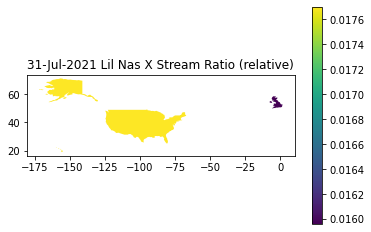

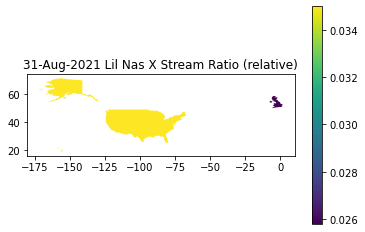

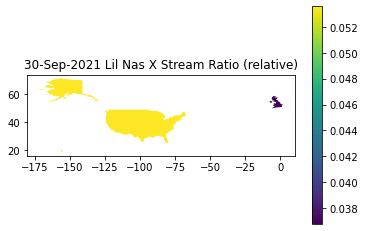

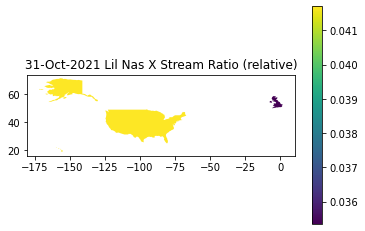

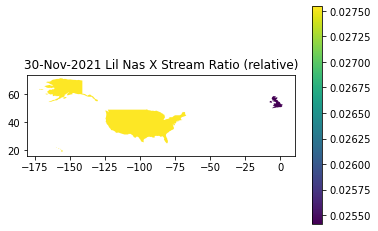

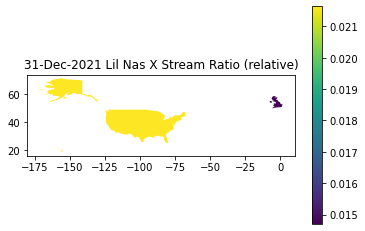

In [113]:
#hide_input
usStreamsToDate = weekly_us_charts[["streams", "date"]]
usMonthlyStreams = usStreamsToDate.groupby([usStreamsToDate['date'].dt.to_period('M')], as_index='false').sum()

ukStreamsToDate = weekly_gb_charts[["streams", "date"]]
ukMonthlyStreams = ukStreamsToDate.groupby([ukStreamsToDate['date'].dt.to_period('M')], as_index='false').sum()


adeleUSStreamToDate = adeleUS[["streams", "date"]]
adeleUSMonthlyStreams= adeleUSStreamToDate.groupby([adeleUSStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
adeleUSMonthlyStreams["iso_a3"] = "USA"
adeleUSMonthlyStreams["streams"] = adeleUSMonthlyStreams["streams"]/usMonthlyStreams["streams"]

adeleUKStreamToDate = adeleUK[["streams", "date"]]
adeleUKMonthlyStreams= adeleUKStreamToDate.groupby([adeleUKStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
adeleUKMonthlyStreams["iso_a3"] = "GBR"
adeleUKMonthlyStreams["streams"] = adeleUKMonthlyStreams["streams"]/ukMonthlyStreams["streams"]


lilnasxUSStreamToDate = lilnasxUS[["streams", "date"]]
lilnasxUSMonthlyStreams= lilnasxUSStreamToDate.groupby([lilnasxUSStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
lilnasxUSMonthlyStreams["iso_a3"] = "USA"
lilnasxUSMonthlyStreams["streams"] = lilnasxUSMonthlyStreams["streams"]/usMonthlyStreams["streams"]

lilnasxUKStreamToDate = lilnasxUK[["streams", "date"]]
lilnasxUKMonthlyStreams= lilnasxUKStreamToDate.groupby([lilnasxUKStreamToDate['date'].dt.to_period('M')], as_index='false').sum()
lilnasxUKMonthlyStreams["iso_a3"] = "GBR"
lilnasxUKMonthlyStreams["streams"] = lilnasxUKMonthlyStreams["streams"]/ukMonthlyStreams["streams"]

def plotmapsStreams(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index:
            d = {'streams': [df1.loc[date]["streams"], df2.loc[date]["streams"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="streams", cmap="viridis",legend=True)
            plt.title(date.strftime('%d-%b-%Y') + " " + artist + " Stream Ratio (relative)")

plotmapsStreams(lilnasxUSMonthlyStreams, lilnasxUKMonthlyStreams, "Lil Nas X")

## Lil Nas X Monthly Stream Ratio  in the US and UK in 2021 

When looking at the Monthly stream ratio, we can see that there is still a clear switch between the UK's love for Lil Nas X over other artists, and the US's. 

Remember in this graph, the higher the stream ratio, the more Lil Nas X songs are listened to- the color yellow is indicative of a greater stream ratio, and purple of a lower. 

So we can see that in the begining, the UK is leading with how much Lil Nas X they're listening to, and the margins are slim- to the 3rd decimal place. Around when Lil Nas X had a 2021 release, early March, we can still see that UK charts are still leading in their listening of Lil Nas X. 

It's only when Lil Nas X's most popular singles release, through May to the end of the year, where the US takes the lead, and a larger lead (The US stream ratio is around 1.5xs greater than the UK in some months) in months following releases. Such as August, following the INDUSTRY BABY release, and October, following the release of THAT'S WHAT I WANT and his album in September 

Now let's move on to Adele! 

## Adele's Maps 

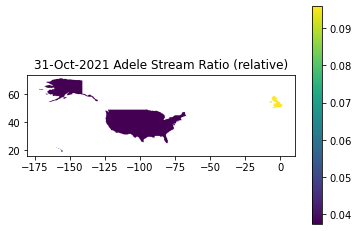

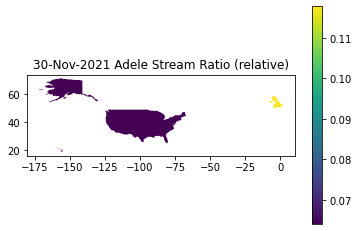

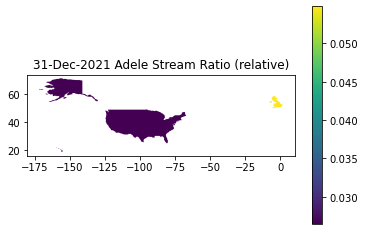

In [114]:
#hide_input
plotmapsStreams(adeleUSMonthlyStreams, adeleUKMonthlyStreams, "Adele")

## Adele Monthly Stream Ratio  in the US and UK in 2021 

The analysis of this is much easier- Adele was not that popular in the US, so she only charted 3 months in the US. 

And we can see that UK is winning every month- Adele is clearly much more popular in the UK, but the peak timing is quite similar, so both the UK and US were able to pick up streaming Adele's new music released in November (the peak of her stream ratio) around the same time. The UK remains a high stream ratio lead to the US as well, almost doubling the stream ratio of the US's every month. 



## Looking at Easy On Me 
Released October 15th, 2021 

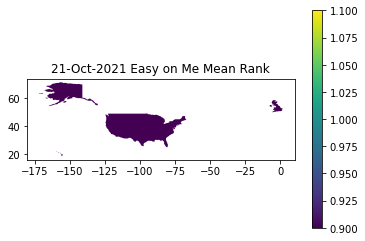

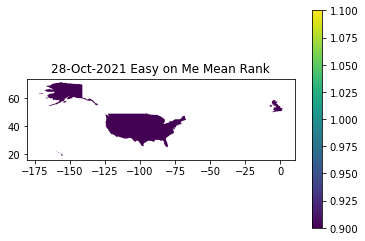

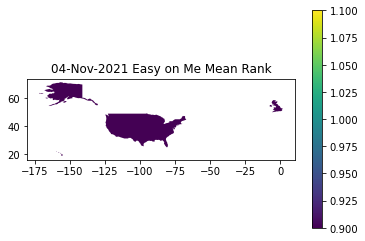

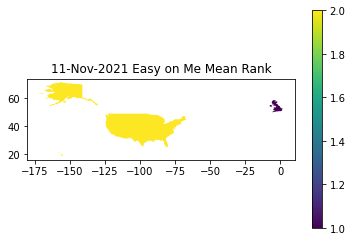

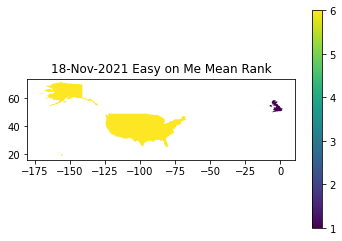

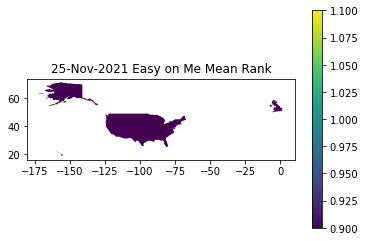

In [115]:
#hide_input
def plotmapForEasyOnMe(df1, df2, artist):
    for date in df1.index:
        if date in df1.index and date in df2.index and date.month == 10 or date.month == 11:
            d = {'rank': [df1.loc[date]["rank"], df2.loc[date]["rank"]], 
                 'iso_a3': [df1.loc[date]["iso_a3"], df2.loc[date]["iso_a3"]]}
            df = pd.DataFrame(data=d)
            table = countries.merge(df, how="left", left_on=['iso_a3'], right_on=['iso_a3'])
            table.plot(column="rank", cmap="viridis",legend=True)
            plt.title(date.strftime('%d-%b-%Y') + " " + artist + " Mean Rank")
adeleUSEasyOnMe = adeleUS.loc[adeleUS['track_name'] == "Easy On Me"]
adeleUSRankToDate = adeleUSEasyOnMe[["rank", "date"]]

adeleUKEasyOnMe = adeleUK.loc[adeleUK['track_name'] == "Easy On Me"]
adeleUKRankToDate = adeleUKEasyOnMe[["rank", "date"]]

adeleUSWeeklyRank = adeleUSRankToDate.groupby([adeleUSRankToDate['date'].dt.date], as_index='false').mean()
adeleUSWeeklyRank["iso_a3"] = "USA"

adeleUKWeeklyRank = adeleUKRankToDate.groupby([adeleUKRankToDate['date'].dt.date], as_index='false').mean()
adeleUKWeeklyRank["iso_a3"] = "GBR"

plotmapForEasyOnMe(adeleUSWeeklyRank, adeleUKWeeklyRank, "Easy on Me")

Looking at only Easy On Me, we can see it was a clear instant hit. But it was a hit longer in the UK, Adele's home country, as the US allows Easy On Me's rank to drop in mid-November. 

# Map Analysis overall results 

Seems like there is a clear correlation between the Artist's country of origin and their popularity in each country. There is also a quicker onset of popularity for the artist in their own origin country, seen through our deeper analysis of weekly rankings of INDUSTRY BABY after its release in the US and UK. 

# Lyrical Analysis

In [125]:
import csv

Note: We replaced the profanity in the lyrics before uploading the csv file.

In [126]:
#Lil Nas X - Industry Baby
file = open('Data/lilnasx_industrybaby.csv')

In [127]:
csvreader = csv.reader(file)

In [128]:
rows = []
for row in csvreader:
    rows += row
#rows

In [160]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [130]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
words = []
for s in rows:
    for w in word_tokenize(s):
        words.append(w)

In [133]:
print(words[:20])

['Baby', 'back', 'ayy', 'Couple', 'racks', ',', 'ayy', 'Couple', 'Grammys', 'on', 'him', 'Couple', 'plaques', ',', 'ayy', 'That', "'s", 'a', 'fact', ',']


The built in word tokenizer didn't work because it splits words with apostrophes, so we built our own. 

In [135]:
lyricwords = []
for row in rows:
    words = row.split(" ")
    for word in words:
        if word[0] == "(" and word[-1] == ",":
            newword = word[1:]
            newword = newword[:len(newword)-1]  
            lyricwords += [newword]
        elif word[-1] == ',':
            newword = word[:len(word)-1]
            lyricwords += [newword]
        elif word[0] == "(" and word[-1] == ")":
            newword = word[1:]
            newword = newword[:len(newword)-1]
            lyricwords += [newword]
        elif word[0] == "(":
            newword = word[1:]
            lyricwords += [newword]
        elif word[-1] == ")":
            newword = word[:len(word)-1]
            lyricwords += [newword]
        else:
            lyricwords += [word]
            
#print(lyricwords)

In [136]:
wordsLower = [each_string.lower() for each_string in lyricwords]
#wordsLower

In [137]:
stopwords = ["the"]
lyricsNoThe = [w for w in wordsLower if w not in stopwords]

In [138]:
from nltk.probability import FreqDist

In [140]:
freq = FreqDist(lyricsNoThe)
#freq

In [141]:
for i in sorted(freq, key=freq.get, reverse=True)[:20]:
    print(i,freq[i])

i 38
yeah 13
you 13
i'm 12
like 11
for 10
ain't 10
me 10
ayy 9
they 9
don't 9
it 8
from 8
get 8
tell 8
back 7
is 7
got 7
your 7
'em 7


In [142]:
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [143]:
sia = vader.SentimentIntensityAnalyzer()

In [144]:
for line in rows: 
    print(line)
    print(sia.polarity_scores(line))

Baby back ayy
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Couple racks, ayy
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Couple Grammys on him
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Couple plaques, ayy
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
That's a fact, ayy
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Throw it back, ayy
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Throw it back, ayy
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
And this one is for the champions
{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.5267}
I ain't lost since I began, yeah
{'neg': 0.0, 'neu': 0.419, 'pos': 0.581, 'compound': 0.4874}
Funny how you said it was the end, yeah
{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.6249}
Then I went did it again, yeah
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.296}
I told you long ago, on the road
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I got what they waitin'

Overall, Lil Nas X's song, "Industry Baby" had mostly neutral to positive polarity scores. The song talks about his accomplishments as well as demonstrates his empowerment over addressing his 'haters.' The frequency distribution of his lyrics illustrate that the song is about himself and others as "I", "you", "me", "they" are among the top of his most used lyrics. 

In [145]:
#Adele - Easy on Me
file2 = open('Data/adele_easyonme.csv')

In [146]:
csvreader2 = csv.reader(file2)

In [147]:
rows2 = []
for row2 in csvreader2:
    rows2 += row2
#rows2

In [148]:
lyricwords2 = []
for row in rows2:
    words2 = row.split(" ")
    for word2 in words2:
        if word2[0] == "(" and word2[-1] == ",":
            newword2 = word2[1:]
            newword2 = newword2[:len(newword2)-1]  
            lyricwords2 += [newword2]
        elif word2[-1] == ',':
            newword2 = word2[:len(word2)-1]
            lyricwords2 += [newword2]
        elif word2[0] == "(" and word2[-1] == ")":
            newword2 = word2[1:]
            newword2 = newword2[:len(newword2)-1]
            lyricwords2 += [newword2]
        elif word2[0] == "(":
            newword2 = word2[1:]
            lyricwords2 += [newword2]
        elif word2[-1] == ")":
            newword2 = word2[:len(word2)-1]
            lyricwords2 += [newword2]
        else:
            lyricwords2 += [word2]
            
#print(lyricwords2)

In [149]:
wordsLower2 = [each_string.lower() for each_string in lyricwords2]
#wordsLower2

In [150]:
stopwords = ["the"]
lyricsNoThe2 = [w for w in wordsLower2 if w not in stopwords]

In [151]:
#print(lyricsNoThe2)

In [152]:
freq2 = FreqDist(lyricsNoThe2)
#freq2

In [154]:
for i in sorted(freq2, key=freq2.get, reverse=True)[:20]:
    print(i,freq2[i])

i 18
to 12
me 10
in 6
go 6
easy 6
on 6
no 5
baby 4
was 4
had 4
so 4
there 3
but 3
still 3
a 3
child 3
didn't 3
get 3
chance 3


In [155]:
for line2 in rows2: 
    print(line2)
    print(sia.polarity_scores(line2))

There ain't no gold in this river
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.2235}
That I've been washin' my hands in forever
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I know there is hope in these waters
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
But I can't bring myself to swim
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
When I am drowning in this silence
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Baby, let me in
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Go easy on me, baby
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
I was still a child
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Didn't get the chance to
{'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.1877}
Feel the world around me
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I had no time to choose
{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
What I chose to do
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

Adele's song, "Easy on Me" had mostly neutral polarity scores. However this is an emotional/sad song about her past relationship. The frequency distribution of her lyrics reveal that the song is about herself as "I", "Go", "Easy", "On" and "Me" came up the most frequently. 

Through our analysis, we found that the reception of an artist's songs, as well as the number of songs that are listened to, might be affected by the origin country of the artist. 

We also found that computerized text analysis may not be enough to perceive human emotions. As shown in Adele’s song “Easy On Me,” the Sentiment Intensity Analyzer averaged a score of 0.084, which meant that the song was very neutral with slight positive sentiment. However, this song is meant to be a very emotional reminiscence of the past with very slight hints of hopefulness. 

For example, here are some lyrics with positive words: 

I had good intentions
And the highest hopes
But I know right now
That probably doesn't even show

In the context of the other negative lyrics, that mention that despite her hopes and good intentions, she still made bad choices, these positive lyrics don’t seem so positive. But our text analysis is not as good at tying verses together and reading this one positive verse in context of the rest of the song. This is a common problem in NLP in that it is hard for a computer to understand the context of a piece of writing, especially when the writing is of an artistic nature like song lyrics can be. 

In Lil Nas X’s “Industry Baby,” the Sentiment Intensity Analyzer averaged a score of 0.129, which was also pretty neutral but again more on the positive side. This song is very different from Adele’s “Easy On Me,” yet they received very similar scores. This again demonstrates that computerized text analysis is not quite able to perceive human emotions as “Industry Baby” is a very upbeat and empowering hype song. 


## Discussion

This is important in the big picture because it starts to paint a picture of how songs spread over time and through countries. Although we were only able to look at 2 artists (Lil Nas X and Adele) in 2 countries (the US and UK), we already began to see the ways in which their songs were received in both of these countries. 

Through our map analysis, we saw clear peaks of ranks a couple weeks to a month after release, and then a slow comedown of ranking and streaming after. The origin country of the artist seemed to have a big effect on how popular an artist’s songs were.

Through our text analysis, we found that two very different songs were at the top of the charts for the US and UK. Although they had similar Sentiment Intensity Analyzer scores, their message and genre of song varied. 

This could potentially mean that people are more likely to listen to artists that are from the same country as them, but also could be confounded by marketing efforts being concentrated in an artist’s home country. However, knowing that an artist’s home country is more receptive to their music, and also that it normally takes a few weeks to a month for a song to truly climb the ranks, could be something to strongly consider when artists are figuring out where to hold events or shows promoting or showing their new music. 

The sort of analysis that we did would be helpful to all artists, especially smaller artists that are trying to gain popularity and trying to target audiences in specific countries. 